In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [76]:


df = pd.read_table(r"C:\Users\Pratheep108\Downloads\archive (8)\airq402.dat", delim_whitespace=True,header=None,names=('City1','City2','Average Fare','Distance','Average weekly passengers','market leading airline','market share','Average fare','Low price airline','market share.1','price'))

In [77]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


Exploratory Data Analysis

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City1                      1000 non-null   object 
 1   City2                      1000 non-null   object 
 2   Average Fare               1000 non-null   float64
 3   Distance                   1000 non-null   int64  
 4   Average weekly passengers  1000 non-null   float64
 5   market leading airline     1000 non-null   object 
 6   market share               1000 non-null   float64
 7   Average fare               1000 non-null   float64
 8   Low price airline          1000 non-null   object 
 9   market share.1             1000 non-null   float64
 10  price                      1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [79]:
df.shape

(1000, 11)

We totally have 1000 rows and 11 columns

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
market share.1,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [81]:
df.isnull().sum()


City1                        0
City2                        0
Average Fare                 0
Distance                     0
Average weekly passengers    0
market leading airline       0
market share                 0
Average fare                 0
Low price airline            0
market share.1               0
price                        0
dtype: int64

In [82]:
##Top five cities

df.City1.value_counts()[0:5]

ATL    64
ORD    63
DFW    52
BWI    47
IAH    38
Name: City1, dtype: int64

In [83]:
##Top five cities

df.City2.value_counts()[0:5]

TPA    46
MCO    43
SEA    42
LGA    42
IAD    40
Name: City2, dtype: int64

C:\Users\Pratheep108\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



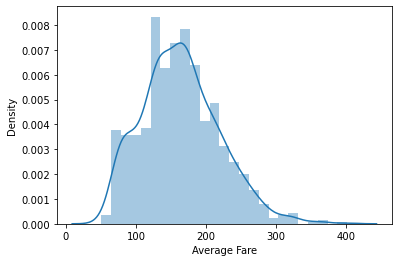

In [84]:
sns.distplot( df['Average Fare']);

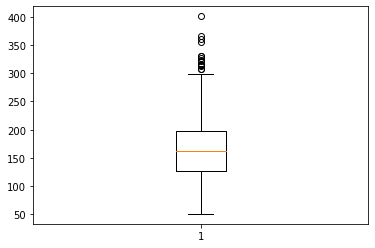

In [85]:
box = plt.boxplot(df['Average Fare']);

In [86]:
[item.get_ydata()[0] for item in box['caps']]

[50.52, 299.31]

In [87]:
[item.get_ydata()[0] for item in box['whiskers']]

[125.975, 197.39249999999998]

In [88]:
[item.get_ydata()[0] for item in box['medians']]

[161.34500000000003]

In [89]:
## Cities with average Fare above Maximum (Q3+1.5IQR)

df.loc[df['Average Fare'] > 299.31,['City1','City2']]

,City1,City2
197,BOS,LAX
212,BOS,SAN
213,BOS,SFO
328,CVG,LAX
607,IAH,SFO
709,LAX,MIA
714,LAX,LGA
737,LAX,IAD
760,MIA,SFO
836,LGA,SAN


C:\Users\Pratheep108\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



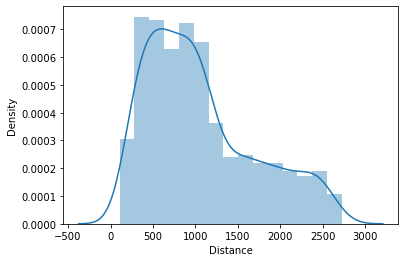

In [90]:
sns.distplot( df['Distance']);

In [91]:
## Most of the distances lie between 500-1000

C:\Users\Pratheep108\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



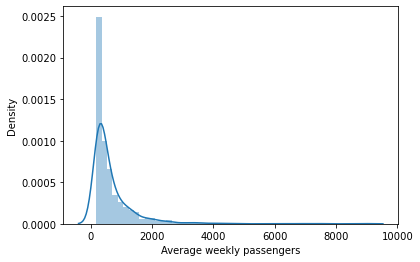

In [92]:
sns.distplot( df['Average weekly passengers']);

In [93]:
df['market leading airline'].value_counts()

WN    257
DL    162
AA    135
UA     91
NW     86
CO     69
US     68
AS     32
HP     30
FL     16
YX     16
B6     14
NK     10
TZ     10
F9      3
G4      1
Name: market leading airline, dtype: int64

<AxesSubplot:xlabel='market leading airline', ylabel='count'>

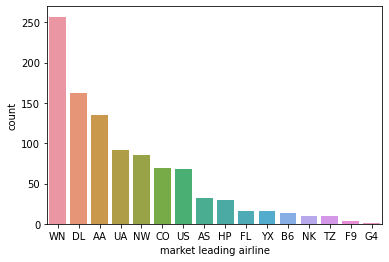

In [94]:
sns.countplot(x="market leading airline",data=df,order = df['market leading airline'].value_counts().index)

Inference :
    The top three Airlines are WN,DL and AA

C:\Users\Pratheep108\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



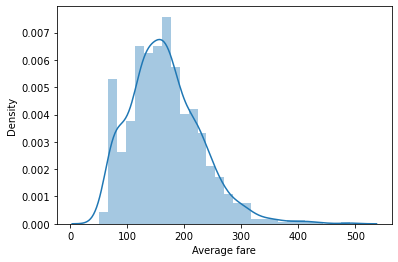

In [95]:
sns.distplot( df['Average fare']);

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City1                      1000 non-null   object 
 1   City2                      1000 non-null   object 
 2   Average Fare               1000 non-null   float64
 3   Distance                   1000 non-null   int64  
 4   Average weekly passengers  1000 non-null   float64
 5   market leading airline     1000 non-null   object 
 6   market share               1000 non-null   float64
 7   Average fare               1000 non-null   float64
 8   Low price airline          1000 non-null   object 
 9   market share.1             1000 non-null   float64
 10  price                      1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [97]:
df['Low price airline'].value_counts()

WN    230
DL    151
AA    129
US    101
FL     60
HP     58
UA     55
CO     45
TZ     34
NW     33
F9     30
AS     27
NK     16
B6     15
SY      7
YX      3
AX      3
AQ      2
G4      1
Name: Low price airline, dtype: int64

<AxesSubplot:xlabel='Low price airline', ylabel='count'>

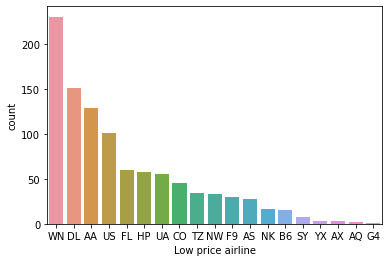

In [98]:
sns.countplot(x="Low price airline",data=df,order = df['Low price airline'].value_counts().index)

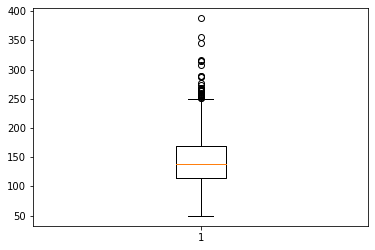

In [99]:
box = plt.boxplot(df['price']);

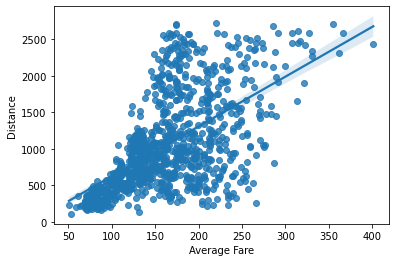

In [100]:
sns.regplot( x = 'Average Fare',
y = 'Distance',
data =df );

## Checking if there any relationship between price and low cost airlines


In [111]:
# Group by 'Low price airline' and calculate the mean price
average_prices = df.groupby('Low price airline')['price'].mean().reset_index()


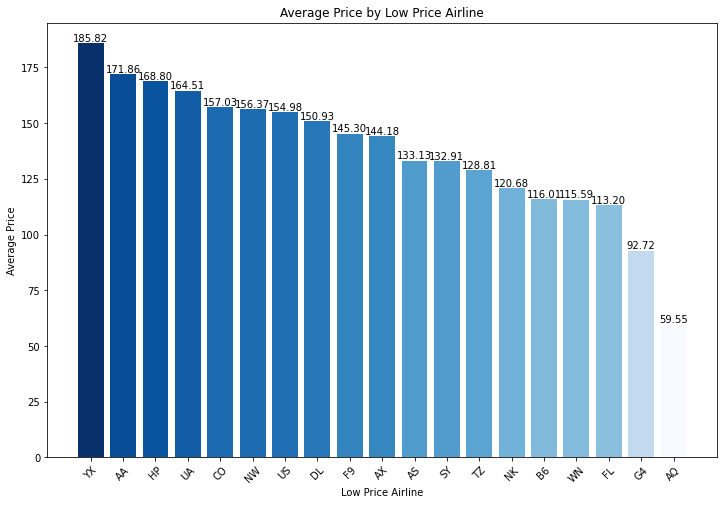

In [113]:
# Sorted the DataFrame by 'Price' in descending order
sorted_averages = average_prices.sort_values('price', ascending=False).reset_index(drop=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Generated a color map based on the 'Price' values
norm = plt.Normalize(sorted_averages['price'].min(), sorted_averages['price'].max())
colors = cm.Blues(norm(sorted_averages['price']))
plt.figure(figsize=(12, 8))  # Set the figure size

# Created a bar plot with the sorted values and apply the color gradient
bars = plt.bar(sorted_averages['Low price airline'], sorted_averages['price'], color=colors)

# Adding title and labels
plt.title('Average Price by Low Price Airline')
plt.xlabel('Low Price Airline')
plt.ylabel('Average Price')

# Loop over the bars to display the average price above each bar
for bar, label in zip(bars, sorted_averages['price']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}', 
             ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()


## AQ is the cheapest airlines compared to other Low price Airline

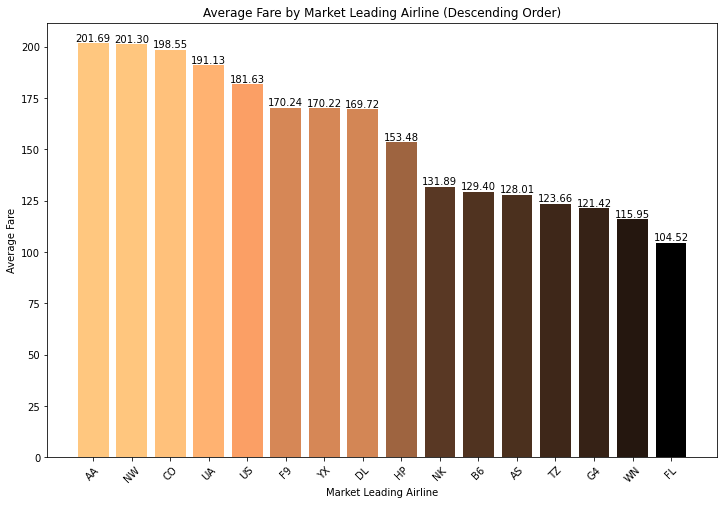

In [116]:
average_fares = df.groupby('market leading airline')['Average Fare'].mean().reset_index()

# Sorted the DataFrame by 'Average Fare' in descending order
sorted_fares = average_fares.sort_values('Average Fare', ascending=False).reset_index(drop=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

norm = plt.Normalize(sorted_fares['Average Fare'].min(), sorted_fares['Average Fare'].max())
colors = cm.copper(norm(sorted_fares['Average Fare']))
plt.figure(figsize=(12, 8))  # Set the figure size

# Created a bar plot with the sorted values and apply the color gradient
bars = plt.bar(sorted_fares['market leading airline'], sorted_fares['Average Fare'], color=colors)

# Adding title and labels
plt.title('Average Fare by Market Leading Airline (Descending Order)')
plt.xlabel('Market Leading Airline')
plt.ylabel('Average Fare')

# Loop over the bars to display the average fare above each bar
for bar, label in zip(bars, sorted_fares['Average Fare']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}', 
             ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotate x-axis labels

plt.show()


## Airline FL has the least minimum fare among all Market leading Airline

Model Building

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City1                      1000 non-null   object 
 1   City2                      1000 non-null   object 
 2   Average Fare               1000 non-null   float64
 3   Distance                   1000 non-null   int64  
 4   Average weekly passengers  1000 non-null   float64
 5   market leading airline     1000 non-null   object 
 6   market share               1000 non-null   float64
 7   Average fare               1000 non-null   float64
 8   Low price airline          1000 non-null   object 
 9   market share.1             1000 non-null   float64
 10  price                      1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


In [118]:
df.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,Average fare,Low price airline,market share.1,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [119]:
numeric = df.select_dtypes(include=['float64', 'int64'])

In [120]:
numeric[0:10]

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
0,114.47,528,424.56,70.19,111.03,70.19,111.03
1,122.47,860,276.84,75.10,123.09,17.23,118.94
2,214.42,852,215.76,78.89,223.98,2.77,167.12
3,69.40,288,606.84,96.97,68.86,96.97,68.86
4,158.13,723,313.04,39.79,161.36,15.34,145.42
5,135.17,1204,199.02,40.68,137.97,17.09,127.69
6,152.85,2237,237.17,59.94,148.59,59.94,148.59
7,190.73,2467,191.95,17.89,205.06,16.59,174.00
8,129.35,1073,550.54,76.84,127.69,76.84,127.69
9,134.17,1130,202.93,35.40,132.91,26.40,124.78


In [121]:
categorical = df.select_dtypes(include=['object'])

In [122]:
categorical[0:5]

,City1,City2,market leading airline,Low price airline
0,CAK,ATL,FL,FL
1,CAK,MCO,FL,DL
2,ALB,ATL,DL,CO
3,ALB,BWI,WN,WN
4,ALB,ORD,UA,WN


In [123]:
# correlation matrix
cor = numeric.corr()
cor

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price
Average Fare,1.000000,0.587169,-0.126175,-0.234142,0.981462,-0.458660,0.866410
Distance,0.587169,1.000000,-0.090131,-0.531406,0.564082,-0.367831,0.583239
Average weekly passengers,-0.126175,-0.090131,1.000000,-0.067605,-0.100946,0.034241,-0.142314
market share,-0.234142,-0.531406,-0.067605,1.000000,-0.220801,0.306832,-0.307672
Average fare,0.981462,0.564082,-0.100946,-0.220801,1.000000,-0.472838,0.826511
market share.1,-0.458660,-0.367831,0.034241,0.306832,-0.472838,1.000000,-0.240186
price,0.866410,0.583239,-0.142314,-0.307672,0.826511,-0.240186,1.000000


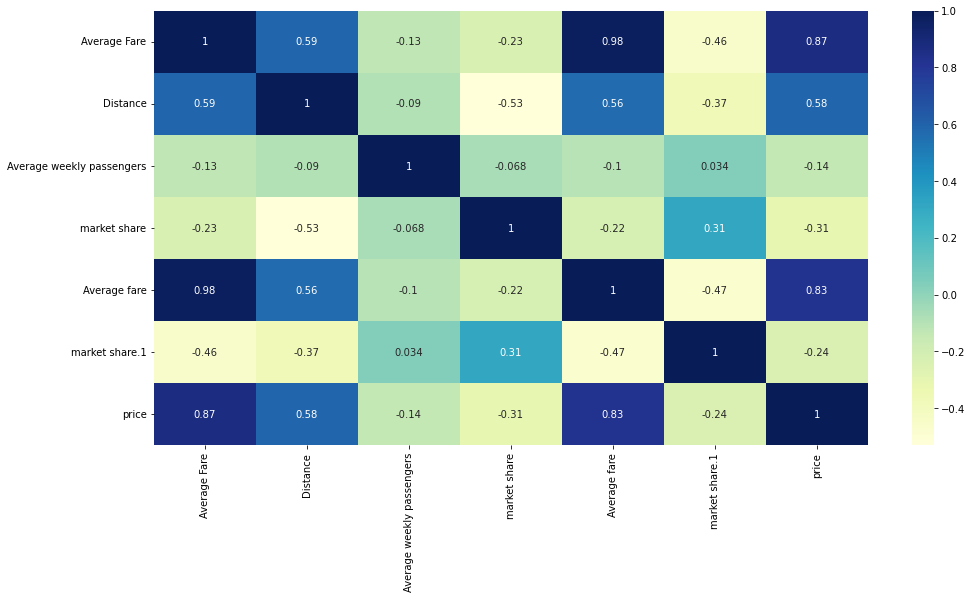

In [124]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

From the above we can infer that Average fare has a good correlation with Distance

C:\Users\Pratheep108\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



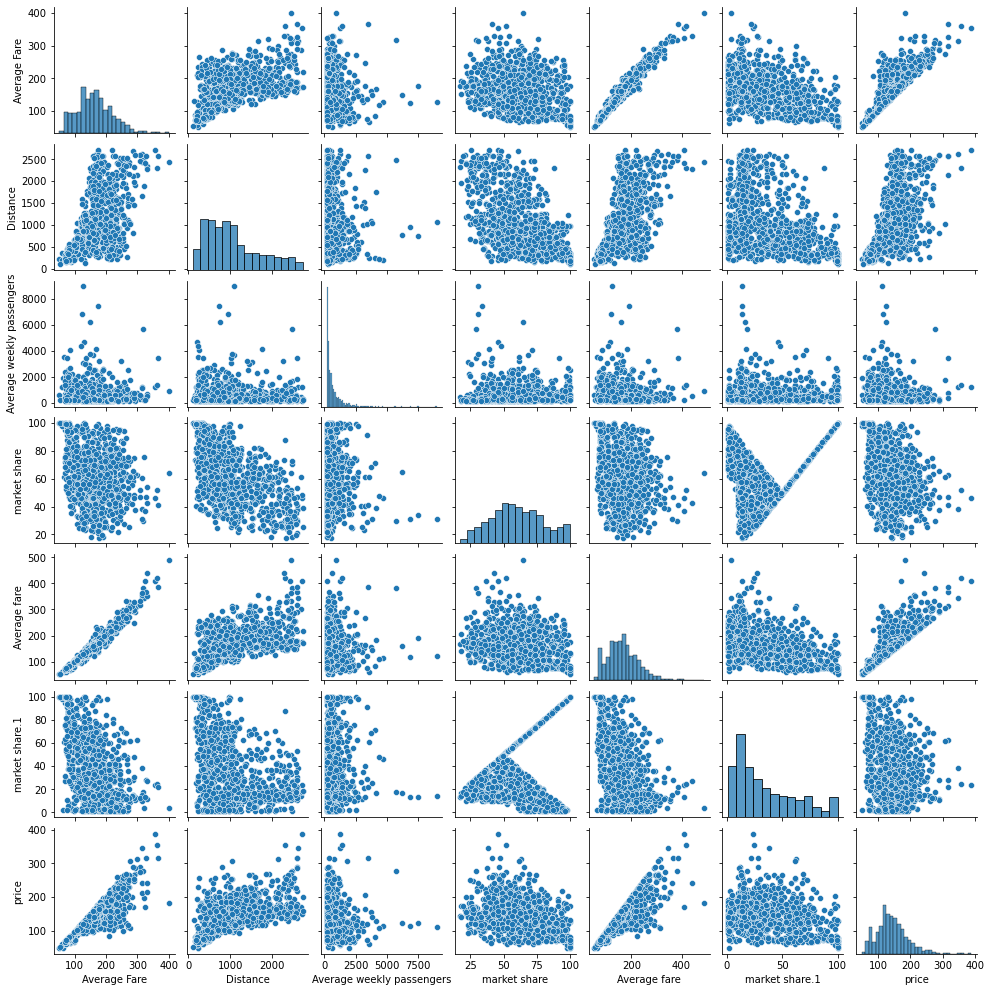

In [125]:
sns.pairplot(numeric, size=2)

Model Building

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City1                      1000 non-null   object 
 1   City2                      1000 non-null   object 
 2   Average Fare               1000 non-null   float64
 3   Distance                   1000 non-null   int64  
 4   Average weekly passengers  1000 non-null   float64
 5   market leading airline     1000 non-null   object 
 6   market share               1000 non-null   float64
 7   Average fare               1000 non-null   float64
 8   Low price airline          1000 non-null   object 
 9   market share.1             1000 non-null   float64
 10  price                      1000 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.1+ KB


Handling the object Variable

In [127]:
df_categorical=df[['City1','City2','market leading airline','Low price airline']]

In [128]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,City1,City2,market leading airline,Low price airline
0,16,0,6,8
1,16,40,6,6
2,2,0,4,5
3,2,7,14,17
4,2,52,12,17


In [129]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Average Fare,Distance,Average weekly passengers,market share,Average fare,market share.1,price,City1,City2,market leading airline,Low price airline
0,114.47,528,424.56,70.19,111.03,70.19,111.03,16,0,6,8
1,122.47,860,276.84,75.10,123.09,17.23,118.94,16,40,6,6
2,214.42,852,215.76,78.89,223.98,2.77,167.12,2,0,4,5
3,69.40,288,606.84,96.97,68.86,96.97,68.86,2,7,14,17
4,158.13,723,313.04,39.79,161.36,15.34,145.42,2,52,12,17


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Average Fare               1000 non-null   float64
 1   Distance                   1000 non-null   int64  
 2   Average weekly passengers  1000 non-null   float64
 3   market share               1000 non-null   float64
 4   Average fare               1000 non-null   float64
 5   market share.1             1000 non-null   float64
 6   price                      1000 non-null   float64
 7   City1                      1000 non-null   int32  
 8   City2                      1000 non-null   int32  
 9   market leading airline     1000 non-null   int32  
 10  Low price airline          1000 non-null   int32  
dtypes: float64(6), int32(4), int64(1)
memory usage: 70.4 KB


Standardization  with z score

In [131]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Average Fare               1000 non-null   float64
 1   Distance                   1000 non-null   int64  
 2   Average weekly passengers  1000 non-null   float64
 3   market share               1000 non-null   float64
 4   Average fare               1000 non-null   float64
 5   market share.1             1000 non-null   float64
 6   price                      1000 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 54.8 KB


In [132]:
from scipy.stats import zscore

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Average Fare               1000 non-null   float64
 1   Distance                   1000 non-null   int64  
 2   Average weekly passengers  1000 non-null   float64
 3   market share               1000 non-null   float64
 4   Average fare               1000 non-null   float64
 5   market share.1             1000 non-null   float64
 6   price                      1000 non-null   float64
 7   City1                      1000 non-null   int32  
 8   City2                      1000 non-null   int32  
 9   market leading airline     1000 non-null   int32  
 10  Low price airline          1000 non-null   int32  
dtypes: float64(6), int32(4), int64(1)
memory usage: 70.4 KB


In [134]:
numeric.drop('Average Fare',axis=1,inplace=True)

In [135]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Distance                   1000 non-null   int64  
 1   Average weekly passengers  1000 non-null   float64
 2   market share               1000 non-null   float64
 3   Average fare               1000 non-null   float64
 4   market share.1             1000 non-null   float64
 5   price                      1000 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 47.0 KB


In [136]:
numeric=numeric.apply(zscore)

In [137]:
numeric.head()

,Distance,Average weekly passengers,market share,Average fare,market share.1,price
0,-0.822816,-0.323336,0.519752,-0.888051,1.315878,-0.681341
1,-0.306391,-0.516148,0.773393,-0.695488,-0.639560,-0.513776
2,-0.318835,-0.595872,0.969177,0.915432,-1.173465,0.506866
3,-1.196135,-0.085415,1.903153,-1.561383,2.304674,-1.574668
4,-0.519494,-0.468897,-1.050651,-0.084427,-0.709344,0.047175


In [138]:
df = df.drop(['Distance','Average weekly passengers','market share','Average fare','market share.1','price'], axis=1)

In [139]:
df.head()

,Average Fare,City1,City2,market leading airline,Low price airline
0,114.47,16,0,6,8
1,122.47,16,40,6,6
2,214.42,2,0,4,5
3,69.40,2,7,14,17
4,158.13,2,52,12,17


In [140]:
#concat numeric with original df
df = pd.concat([df,numeric], axis=1)

In [141]:
df.head()

,Average Fare,City1,City2,market leading airline,Low price airline,Distance,Average weekly passengers,market share,Average fare,market share.1,price
0,114.47,16,0,6,8,-0.822816,-0.323336,0.519752,-0.888051,1.315878,-0.681341
1,122.47,16,40,6,6,-0.306391,-0.516148,0.773393,-0.695488,-0.639560,-0.513776
2,214.42,2,0,4,5,-0.318835,-0.595872,0.969177,0.915432,-1.173465,0.506866
3,69.40,2,7,14,17,-1.196135,-0.085415,1.903153,-1.561383,2.304674,-1.574668
4,158.13,2,52,12,17,-0.519494,-0.468897,-1.050651,-0.084427,-0.709344,0.047175


In [142]:
df.shape

(1000, 11)

Define x and Y variables

In [143]:
X =df.drop('Average Fare',axis=1)
y=df['Average Fare']

In [144]:
#Creating train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [145]:
import statsmodels.api as sm 

In [146]:
lm = sm.OLS(y_train, X_train).fit() 

In [147]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:           Average Fare   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              785.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                        0.00
Time:                        10:55:56   Log-Likelihood:                         -3720.9
No. Observations:                 700   AIC:                                      7462.
Df Residuals:                     690   BIC:                                      7507.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

Inference

Auto corrrelation - Is present as Durbin-Watson is 1.75 
Jarque-Bera (JB):  Value is considerably low so it is normaly distributed 
No warnings related to Multicollinearity is present 

Check of linearity- Rainbow Test

In [148]:
sm.stats.diagnostic.linear_rainbow(lm, frac=0.5)

(1.0909128148589982, 0.20994082574845035)

Linearity test is failed

In [149]:
# Finding the Values
fittedvalues = lm.fittedvalues
residuals = lm.resid
st_residual = lm.get_influence().resid_studentized_internal

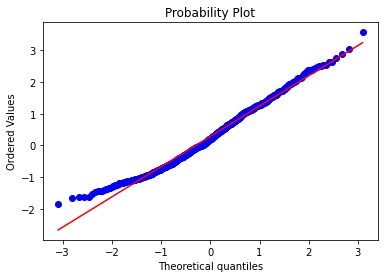

In [150]:
# QQ Plot - 
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
stats.probplot(st_residual, dist="norm", plot=pylab)
plt.show()

Test for Multicollinearity 

In [151]:
X.columns

Index(['City1', 'City2', 'market leading airline', 'Low price airline',
       'Distance', 'Average weekly passengers', 'market share', 'Average fare',
       'market share.1', 'price'],
      dtype='object')

In [152]:
# VIF - Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(X.values, col) 
                   for col in range(0, X.shape[1])]

In [153]:
ce = ['City1', 'City2', 'market leading airline', 'Low price airline',
       'Distance', 'Average weekly passengers', 'market share', 'Average fare',
       'market share.1', 'price']

In [154]:
vif["Feature Names"] = ce

In [155]:
vif

,VIF Values,Feature Names
0,3.487933,City1
1,4.611549,City2
2,3.380312,market leading airline
3,3.771705,Low price airline
4,2.099403,Distance
5,1.057375,Average weekly passengers
6,1.582555,market share
7,4.754609,Average fare
8,1.644946,market share.1
9,4.244785,price


Multicollinearity is not present 

# Test of Heteroscedasticity - Goldfend Quandt test

1. Null Hypothesis - The Data is HOMOSCEDASTIC (Uniform Variance)
2. Alternate Hypothesis - Data is HETEROSCEDASTIC( Unequal Variance)

In [156]:
from statsmodels.stats.api import linear_rainbow, het_goldfeldquandt
het_goldfeldquandt(y, X)

(0.5107305176379157, 0.9999999999999113, 'increasing')

Building the Linear regression model

In [157]:
lm = LinearRegression() # created the machine learning algo

In [158]:
# use the lm to train my dataset
lm.fit(X_train, y_train) # Model is fitted on the training data

LinearRegression()

In [159]:
lm.predict(X_test)

array([168.89341229, 209.33315245, 181.15345848, 288.8299967 ,
       172.99619899,  83.51137705, 179.19059136, 207.22430531,
       135.90528909,  73.54383828,  95.28861425, 161.97535293,
       176.02713325, 164.28756705,  81.1799158 , 251.24019013,
       220.95567812, 261.31365422, 175.63722195, 184.53014835,
       116.52005845, 245.80115215, 150.74896938, 138.18712093,
       225.12661776, 218.19722712, 130.01431448, 201.75845194,
       165.52751626, 211.88716226,  87.0822245 ,  73.89645541,
       336.64783124,  95.08963924, 176.91292113, 389.1820676 ,
       194.37955507, 177.42053666, 166.60924183, 188.57762082,
       207.16763688, 169.58599629, 172.79883   , 130.59664083,
        83.78791134, 214.81108507, 164.96499973, 255.96700967,
       167.50003825, 156.76570228, 107.13633584, 231.69383672,
       108.27668229, 182.67620162, 108.14048097, 121.60726187,
        58.87809363, 125.58715009, 137.58929299, 238.04153912,
       122.9876504 , 137.94346478, 139.5535104 , 136.49

In [160]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.9761289822556631


In [161]:
# Adding a Constant - Purpose | Helps in Calculation of Intercept
X = sm.add_constant(X)
# Building the Model
ins_model = sm.OLS(y,X).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(X) # Making Prediction on X values 

C:\Users\Pratheep108\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [162]:
# R Square Values
print(ins_model.rsquared)
print(ins_model.rsquared_adj)

0.9751550099184068
0.974903796671879


In [163]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y, ins_pred))
print(np.sqrt(mean_squared_error(y, ins_pred)))

6.186227379274431
8.722503473690573


### Objective - Enhance the Prediction Power of the Model

In [164]:
from sklearn.preprocessing import PolynomialFeatures

In [165]:
pf = PolynomialFeatures()

In [166]:
# Transformed the Input Variabes for a better modelling
X = pf.fit_transform(X)

In [167]:
# Building the Model
ins_model = sm.OLS(y,X).fit() # Fitting the Model on the Data
ins_pred = ins_model.predict(X) # Making Prediction on X values 
st_residual = ins_model.get_influence().resid_studentized_internal

In [168]:
# Find the Rsquare
print(ins_model.rsquared)
print(ins_model.rsquared_adj)

0.9889705802104025
0.9882030081693706


In [169]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y, ins_pred))
print(np.sqrt(mean_squared_error(y, ins_pred)))

3.839983233707683
5.811631520223113


#  Random Forest Ensemble Method - Bagging

In [170]:

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

In [171]:

rf = RandomForestRegressor()
bag = BaggingRegressor()

In [172]:
# Random Forest
rf.fit(X,y)
pred_rf = rf.predict(X)
print(mean_absolute_error(y, pred_rf))
print(np.sqrt(mean_squared_error(y, pred_rf)))

1.8709525999999987
2.91313829767486


In [173]:
# Bagging
bag.fit(X,y)
pred_bag = bag.predict(X)
print(mean_absolute_error(y, pred_bag))
print(np.sqrt(mean_squared_error(y, pred_bag)))

2.223852000000001
3.8937491960833843


# Inference



The best model in terms of Mean Absolute error is as follows: Polynomial--->Bagging-->Random forest-->Linear

The most important feature for predicting Average Fare is Distance, Price which can be infered from the Pair Plot